In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('/kaggle/input/houses-price/House Price.csv')

# Display the first few rows of the dataset

In [62]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   ID     Location  Size (sq ft)  Bedrooms  Bathrooms  Year Built  \
0   1     Downtown          1500         3          2        2000   
1   2      Suburbs          2000         4          3        2010   
2   3     Downtown           800         2          1        1995   
3   4  Countryside          2500         5          4        2015   
4   5      Suburbs          1800         4          2        2005   

   Garage Size  Lot Size (acres)  Condition Price ($)  
0            1              0.25       Good  3,00,000  
1            2              0.50  Excellent  4,50,000  
2            0              0.10       Fair  2,00,000  
3            3              1.00  Excellent  6,00,000  
4            2              0.30       Good  3,50,000  


In [63]:
# Clean and convert the 'Price ($)' column
data['Price ($)'] = data['Price ($)'].replace('[\$,]', '', regex=True).astype(float)

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Define features and target variable
X = data.drop('Price ($)', axis=1)
y = data['Price ($)']

# Preprocessing pipeline
numeric_features = ['Size (sq ft)', 'Bedrooms', 'Bathrooms', 'Year Built', 'Garage Size', 'Lot Size (acres)']
categorical_features = ['Location', 'Condition']

# Define the preprocessing for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Define the preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")


Missing values in the dataset:
ID                  0
Location            0
Size (sq ft)        0
Bedrooms            0
Bathrooms           0
Year Built          0
Garage Size         0
Lot Size (acres)    0
Condition           0
Price ($)           0
dtype: int64

Model Evaluation:
Mean Squared Error: 479259679.36
R^2 Score: 0.97


# Plotting actual vs predicted prices

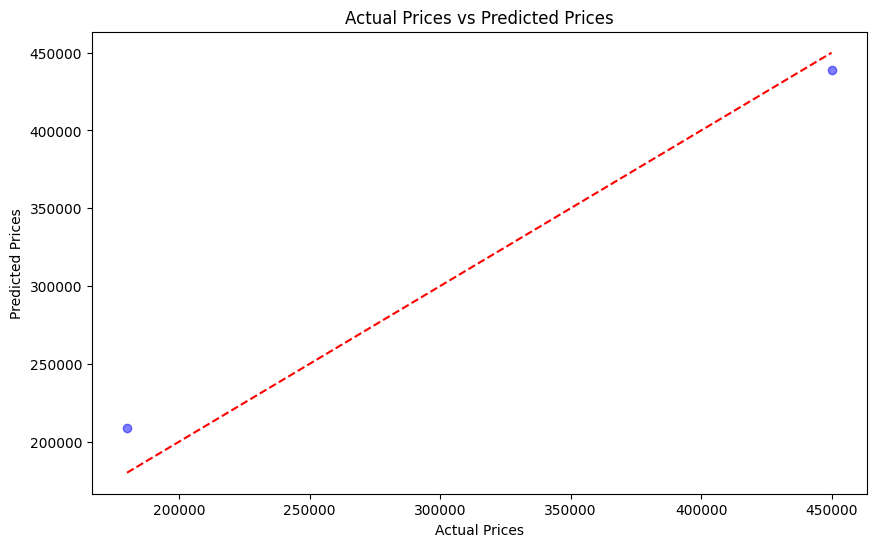

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()